**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

**1**. (20 points)

Consider the linear transformation $f(x)$ on $\mathbb{R}^3$ that takes the standard basis $\left\{e_1,e_2,e_3\right\}$ to $\left\{v_1,v_2,v_3\right\}$ where

$$v_1=\left(\begin{matrix}10\\-10\\16\end{matrix}\right), v_2=\left(\begin{matrix}2\\-5\\20\end{matrix}\right) \textrm {and } v_3=\left(\begin{matrix}1\\-4\\13\end{matrix}\right)$$

1. Write a matrix $A$ that represents the same linear transformation. (4 points)

2. Compute the rank of $A$ using two different methods (do not use `matrix_rank`!). (4 points)

3. Find the eigenvalues and eigenvectors of $A$. (4 points)

4. What is the matrix representation of $f$ with respect to the eigenbasis? (8 points)

In [3]:
A = np.array([[10,-10,16], [2, -5, 20], [1, -4, 13]]).T
A

array([[ 10,   2,   1],
       [-10,  -5,  -4],
       [ 16,  20,  13]])

In [4]:
import scipy.linalg as la

Number of pivots after LU

In [5]:
P, L, U = la.lu(A)
np.diag(U)

array([ 16.        , -10.5       ,  -0.96428571])

Number of singular values greater than machine precision

In [6]:
U, s, V = la.svd(A)
len(s)

3

Number of non-zero eigenvalues

In [7]:
np.real_if_close(la.eigvals(A))

array([9., 3., 6.])

Determinant is not zero so must be full rank

In [8]:
la.det(A)

161.9999999999999

Find eigenvalues and eigenvectors

In [9]:
vals, vecs = la.eig(A)

Matrix representation of f with respect to the eigenbasis

In [10]:
np.diag(np.real_if_close(vals))

array([[9., 0., 0.],
       [0., 3., 0.],
       [0., 0., 6.]])

**2**. (20 points)

You are given the following x-y coordinates (first column is x, second is y)

```
array([[  0.        ,   4.12306991],
       [  3.        , -15.47355729],
       [  4.        , -11.68725507],
       [  3.        , -20.33756693],
       [  5.        ,  -6.06401989],
       [  6.        ,  32.79353057],
       [  8.        ,  82.48658405],
       [  9.        ,  84.02971858],
       [  4.        ,  -1.30587276],
       [  8.        ,  68.59409878]])
```

- Find the coefficients $(a, b, c)$ of the least-squares fit of a quadratic function $y = a + bx + cx^2$ to the data. 
- Plot the data and fitted curve using `matplotlib`.

In [11]:
xs = np.array([
    [  0.        ,   4.12306991],
    [  3.        , -15.47355729],
    [  4.        , -11.68725507],
    [  3.        , -20.33756693],
    [  5.        ,  -6.06401989],
    [  6.        ,  32.79353057],
    [  8.        ,  82.48658405],
    [  9.        ,  84.02971858],
    [  4.        ,  -1.30587276],
    [  8.        ,  68.59409878]])

In [12]:
X = xs[:, 0].reshape(-1,1) ** np.array([0,1,2])
y = xs[:, 1].reshape(-1,1)

In [13]:
from scipy.linalg import lstsq

In [14]:
(a, b, c), res, rank, s = lstsq(X, y)

In [15]:
a, b, c

(array([-0.35762896]), array([-11.78531232]), array([2.53125199]))

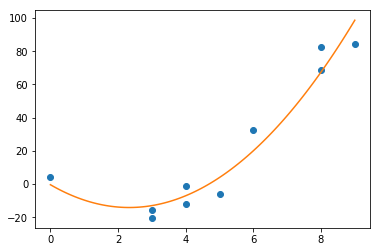

In [16]:
xp = np.linspace(xs[:,0].min(), xs[:,0].max(), 100)
plt.plot(xs[:, 0], xs[:, 1], 'o')
plt.plot(xp, a + b*xp + c*xp**2, '-')
pass

**3**. (20 points)

Use the `svd` function to solve the least squares problem above, and repeat the same plot. Calculate the residual error $\lvert y - X\beta \rvert$.

In [17]:
from scipy.linalg import svd, norm

In [18]:
U, S, V = svd(X, )

In [19]:
U.shape, S.shape, V.shape

((10, 10), (3,), (3, 3))

In [20]:
S

array([132.86424774,   4.91317461,   0.97590399])

In [21]:
G = np.zeros((V.shape[0], U.shape[0]))
for i, s in enumerate(S):
    G[i,i] = 1/s
betas = V.T @ G @ U.T @ y

In [22]:
res = norm(y - X @ betas)
res

5.3868440487073235

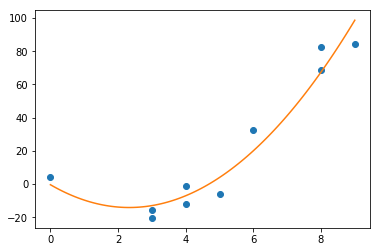

In [23]:
a, b, c = betas
xp = np.linspace(xs[:,0].min(), xs[:,0].max(), 100)
plt.plot(xs[:, 0], xs[:, 1], 'o')
plt.plot(xp, a + b*xp + c*xp**2, '-')
pass

**4**. (20 points) 

Avoiding catastrophic cancellation.

Read the Wikipedia entry on [loss of significance](https://en.wikipedia.org/wiki/Loss_of_significance). Then answer the following problem:

The tail of the standard logistic distribution is given by $1 - F(t) = 1 - (1+e^{-t})^{-1}$.

- Define a function `f1` to calculate the tail probability of the logistic distribution using the formula given above
- Use [`sympy`](http://docs.sympy.org/latest/index.html) to find the exact value of the tail distribution (using the same symbolic formula) to 20 decimal digits
- Calculate the *relative error* of `f1` when $t = 25$ (The relative error is given by `abs(exact - approximate)/exact`)
- Rewrite the expression for the tail of the logistic distribution using simple algebra so that there is no risk of cancellation, and write a function `f2` using this formula. Calculate the *relative error* of `f2` when $t = 25$. 
- How much more accurate is `f2` compared with `f1` in terms of the relative error?

In [24]:
def f1(t):
    """Calculates tail probabilty of the logistic distribution."""
    return 1 - 1.0/(1 + np.exp(-t))

def fsymb(t, n=20):
    """Exact value to n decimal digits using symbolic algebra."""
    from sympy import exp
    return (1 - 1/(1 + exp(-t))).evalf(n=n)

def f2(t):
    """Calculates tail probabilty of the logistic distribution - no cancellation."""
    return 1/(1 + np.exp(t))

r1 = abs(fsymb(25) - f1(25))/fsymb(25)
r2 = abs(fsymb(25) - f2(25))/fsymb(25)

print("Relative error of f1:\t%.16f" % r1)
print("Relative error of f2\t%.16f" % r2)
print("f2 improvieemnt over f1\t%g" % (r1/r2))

Relative error of f1:	0.0000041759147666
Relative error of f2	0.0000000000000001
f2 improvieemnt over f1	3.66247e+10


**5**. (50 points)

Read in `figs/elephant.jpg` as a gray-scale image. The image has $1066 \times 1600$ values. Using SVD, recreate the image with a relative error of less than 0.5%. What is the relative size of the compressed image as a percentage?

In [25]:
from skimage import io
img = io.imread('figs/elephant.jpg', as_grey=True)

In [26]:
img.shape

(1066, 1600)

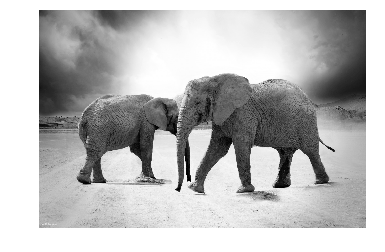

In [27]:
plt.imshow(img, cmap='gray')
plt.gcf().set_frameon(False)
plt.gca().set_axis_off()
pass

In [28]:
U, S, V = svd(img)

In [29]:
U.shape, S.shape, V.shape

((1066, 1066), (1066,), (1600, 1600))

In [30]:
k = np.sum(np.cumsum((S**2)/(S**2).sum()) <= 0.995)

In [31]:
i = U[:,:k] @ np.diag(S[:k])@ V[:k, :]

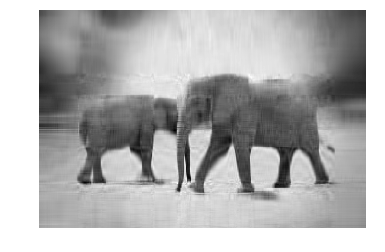

In [32]:
plt.imshow(i, cmap='gray')
plt.gcf().set_frameon(False)
plt.gca().set_axis_off()
pass

In [33]:
space = U.shape[0]*k + k + k*V.shape[1]
100.0 * space / np.prod(img.shape)

3.12734521575985